In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
df=pd.read_csv("DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv")

In [3]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
df_c=df

In [5]:
df_c.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [7]:
df_c.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [8]:
df_c[df_c.duplicated()].head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
68,34,23,10,3,4,118,10,10,37,253.465,...,0,1,0,0,0,0,83,172,28,3
88,28,23,11,4,4,225,26,9,28,306.345,...,0,1,1,0,0,2,69,169,24,1
109,10,22,12,4,4,361,52,3,28,261.306,...,0,1,1,1,0,4,80,172,27,8
127,34,27,1,2,2,118,10,10,37,308.593,...,0,1,0,0,0,0,83,172,28,2


In [9]:
df_c=df_c.drop_duplicates(ignore_index=True)

In [10]:
df_c[df_c.duplicated()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [11]:
df_c.shape

(706, 21)

In [12]:
df_c['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [13]:
df_c['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [14]:
df_c['Disciplinary failure'].unique()

array([0, 1], dtype=int64)

In [15]:
df_c['Work load Average/day '].unique()

array([239.554, 205.917, 241.476, 253.465, 306.345, 261.306, 308.593,
       302.585, 343.253, 326.452, 378.884, 377.55 , 275.312, 265.615,
       294.217, 265.017, 284.031, 236.629, 330.061, 251.818, 244.387,
       239.409, 246.074, 253.957, 230.29 , 249.797, 261.756, 284.853,
       268.519, 280.549, 313.532, 264.249, 222.196, 246.288, 237.656,
       275.089, 264.604, 271.219])

In [16]:
df_c['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [17]:
df_c=df_c.drop(['ID',"Weight","Height"],axis=1)

## EDA

array([[<AxesSubplot:title={'center':'Reason for absence'}>,
        <AxesSubplot:title={'center':'Month of absence'}>,
        <AxesSubplot:title={'center':'Day of the week'}>,
        <AxesSubplot:title={'center':'Seasons'}>],
       [<AxesSubplot:title={'center':'Transportation expense'}>,
        <AxesSubplot:title={'center':'Distance from Residence to Work'}>,
        <AxesSubplot:title={'center':'Service time'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Work load Average/day '}>,
        <AxesSubplot:title={'center':'Hit target'}>,
        <AxesSubplot:title={'center':'Disciplinary failure'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Son'}>,
        <AxesSubplot:title={'center':'Social drinker'}>,
        <AxesSubplot:title={'center':'Social smoker'}>,
        <AxesSubplot:title={'center':'Pet'}>],
       [<AxesSubplot:title={'center':'Body mass index'}>,
        <AxesSubplot:title={'cen

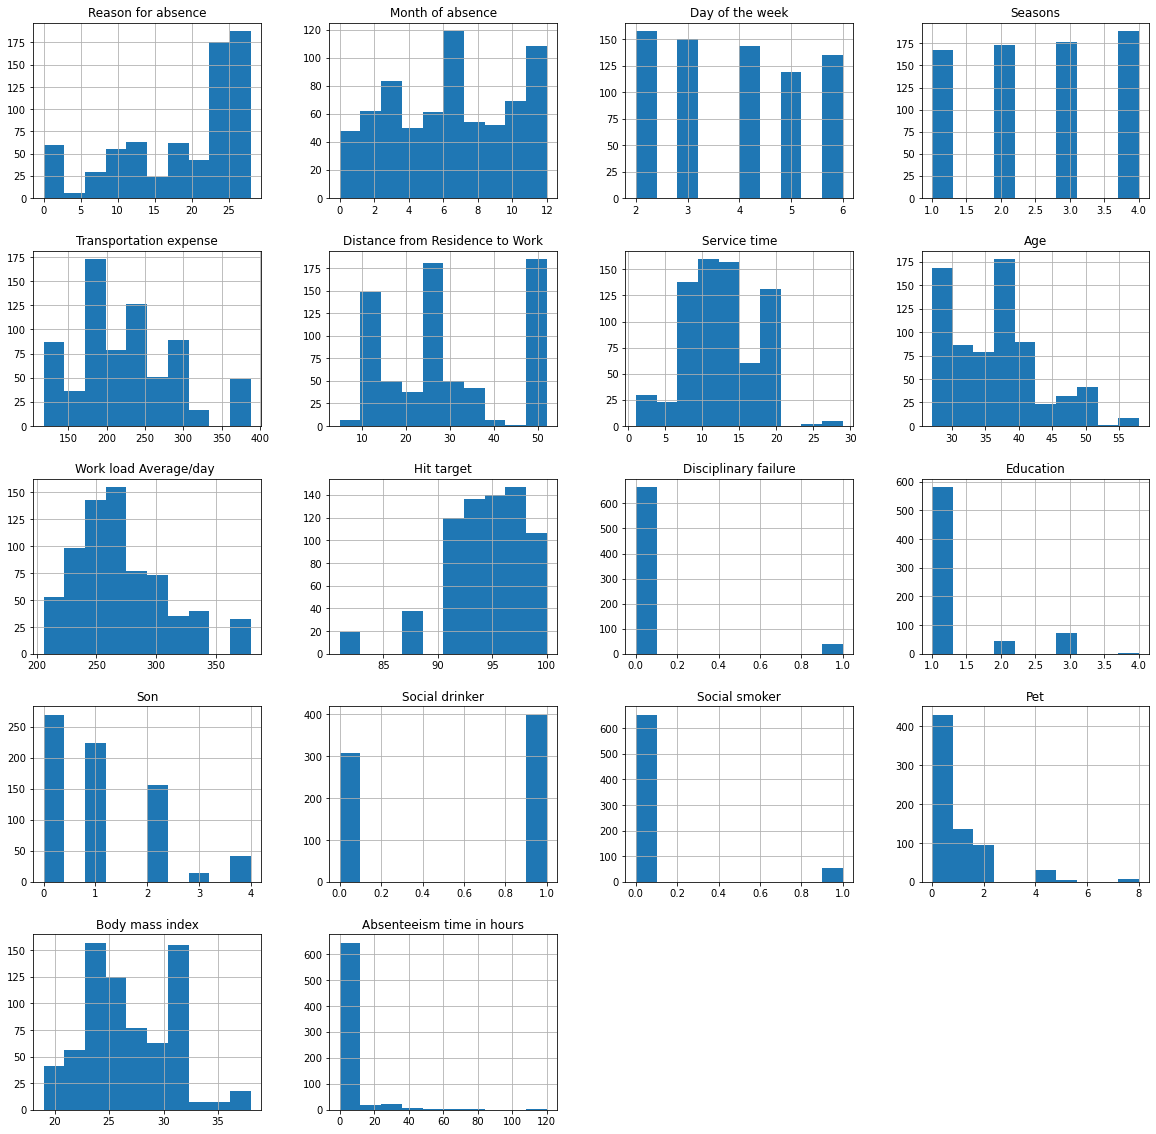

In [18]:
df_c.hist(figsize=(20,20),bins=10)

Text(0, 0.5, 'Frequency')

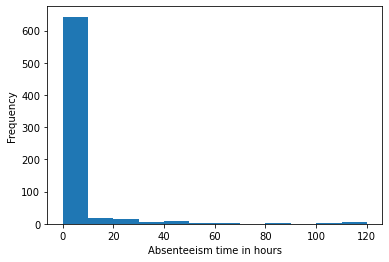

In [19]:
plt.hist(df_c['Absenteeism time in hours'],bins=12)
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='count'>

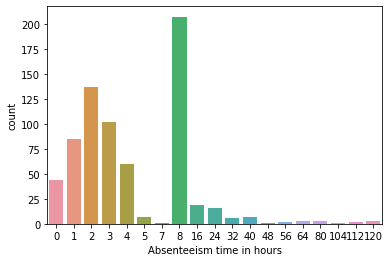

In [20]:
sns.countplot(x= df_c["Absenteeism time in hours"])

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='count'>

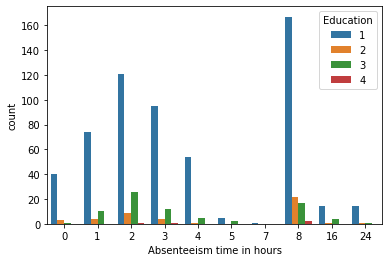

In [21]:
data1=df[(df['Absenteeism time in hours']<25)]
sns.countplot(x= data1["Absenteeism time in hours"],hue=data1['Education'])

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='count'>

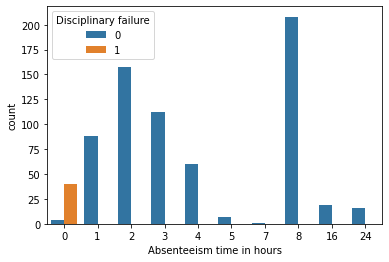

In [22]:
sns.countplot(x= data1["Absenteeism time in hours"],hue=data1['Disciplinary failure'])

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='count'>

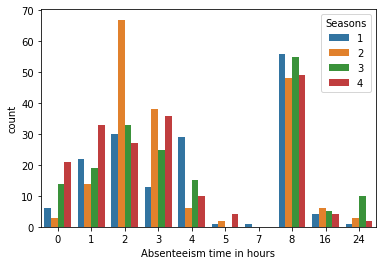

In [23]:
sns.countplot(x= data1["Absenteeism time in hours"],hue=data1['Seasons'])

In [24]:
df_c.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='Age'>

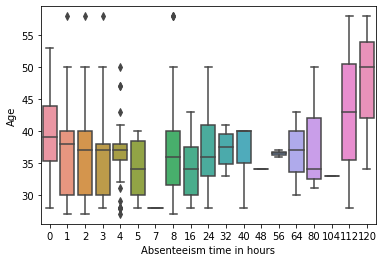

In [25]:
sns.boxplot(y = df_c["Age"], x = df_c["Absenteeism time in hours"])

<AxesSubplot:xlabel='Absenteeism time in hours', ylabel='Work load Average/day '>

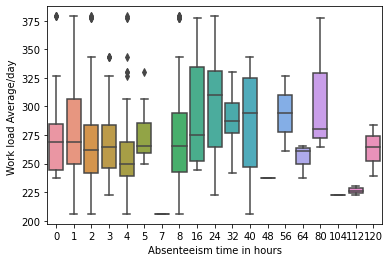

In [26]:
sns.boxplot(y = df_c["Work load Average/day "], x = df_c["Absenteeism time in hours"])

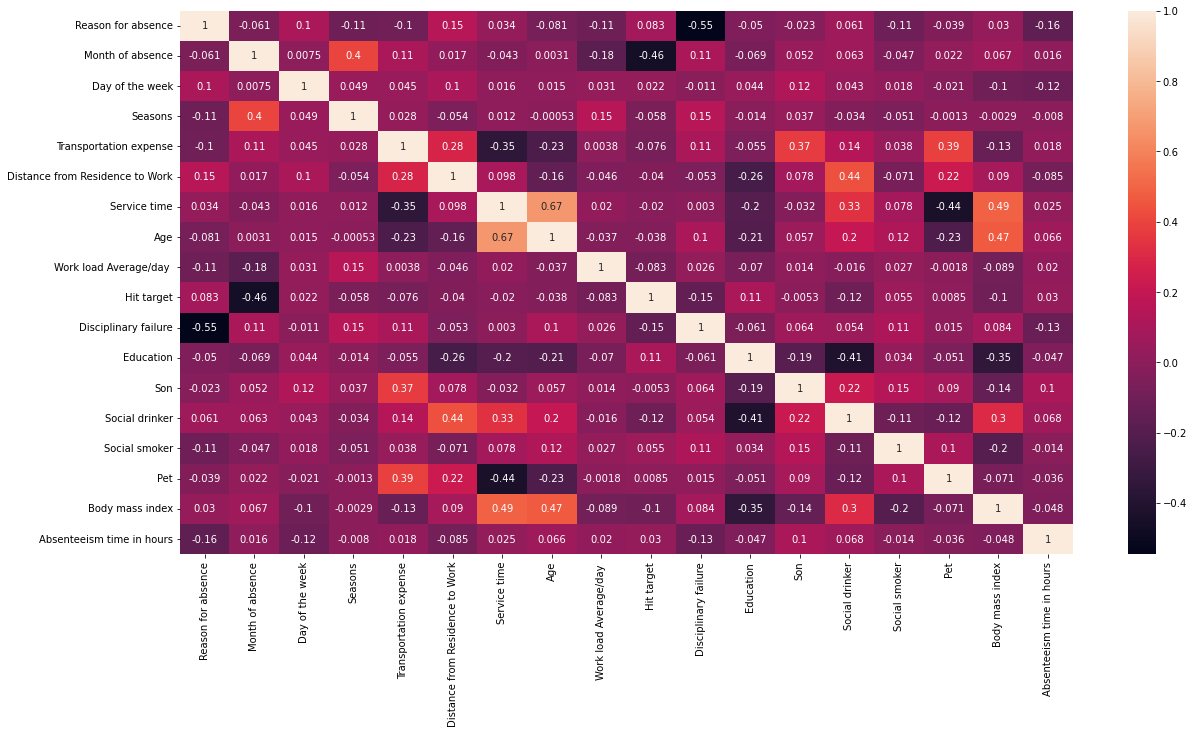

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df_c.corr(), annot=True);

## Feature Engineering

In [28]:
df_c.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [29]:
scaler=MinMaxScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(df_c),columns=df_c.columns)

In [30]:
x_scaled

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.578947,0.033333
1,0.000000,0.583333,0.25,0.000000,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.000000,0.25,1.0,0.0,0.000,0.631579,0.000000
2,0.821429,0.583333,0.50,0.000000,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.631579,0.016667
3,0.250000,0.583333,0.75,0.000000,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.000000,0.50,1.0,1.0,0.000,0.263158,0.033333
4,0.821429,0.583333,0.75,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.578947,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.500000,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.339296,0.631579,0.0,0.000000,0.50,1.0,0.0,0.125,0.578947,0.066667
702,0.392857,0.583333,0.25,0.000000,0.433333,0.127660,0.464286,0.322581,0.339296,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.526316,0.033333
703,0.000000,0.000000,0.25,0.000000,0.000000,0.191489,0.428571,0.419355,0.377540,0.736842,0.0,0.000000,0.25,1.0,0.0,1.000,0.789474,0.000000
704,0.000000,0.000000,0.50,0.333333,0.418519,0.638298,0.464286,0.387097,0.377540,0.736842,0.0,0.000000,0.50,1.0,0.0,0.250,0.842105,0.000000


## Dimensionality Reduction

In [31]:
pca=PCA(n_components=8)
pca_df=pca.fit_transform(x_scaled)
pca_ratio=pca.explained_variance_ratio_
pca_ratio

array([0.22587496, 0.12964683, 0.10409262, 0.08860457, 0.08108262,
       0.0595531 , 0.05726691, 0.04830189])

In [32]:
sum(pca_ratio)

0.7944234972075127

## Bulding model

## KMeans

In [33]:
x=x_scaled

In [34]:
km=KMeans(n_clusters=3)
km_nor=km.fit_predict(x)

In [35]:
 metrics.silhouette_score(x,km.labels_)

0.16245370301639828

## KMeans With Dimensionality Reduction

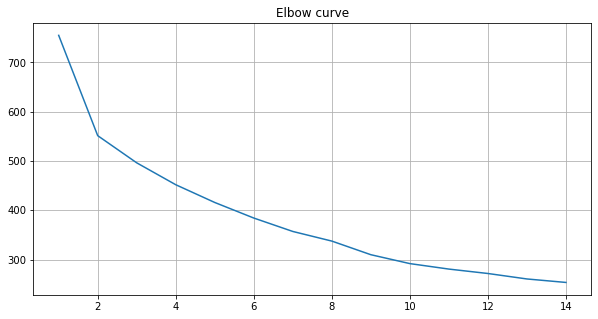

In [36]:
distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), distorsions)
plt.grid(True)

plt.title('Elbow curve');

In [37]:
km1=KMeans(n_clusters=2)
km_pca=km1.fit_predict(pca_df)

In [38]:
x['pca_km_labels']=km1.labels_

In [39]:
 metrics.silhouette_score(x,x['pca_km_labels'])

0.31629150651871035

In [40]:
df_c.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

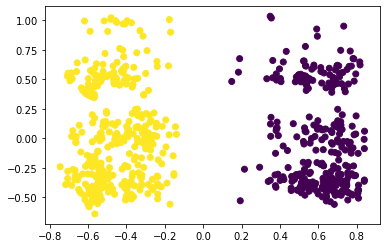

In [41]:
plt.scatter(pca_df[:,0],pca_df[:,1], c=x['pca_km_labels'])

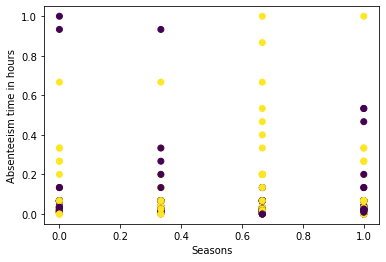

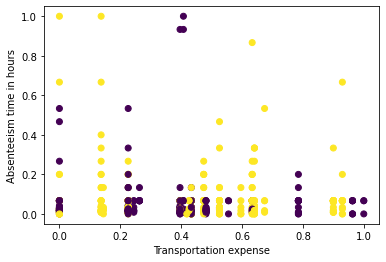

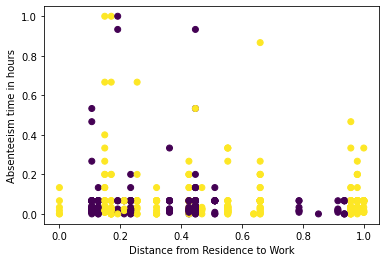

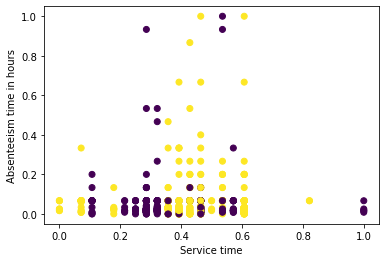

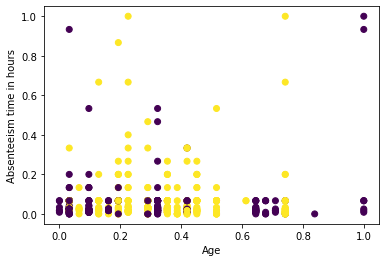

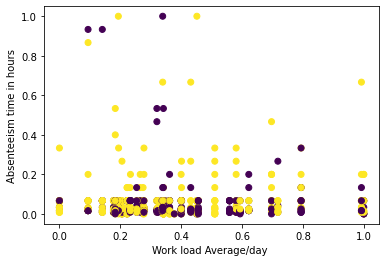

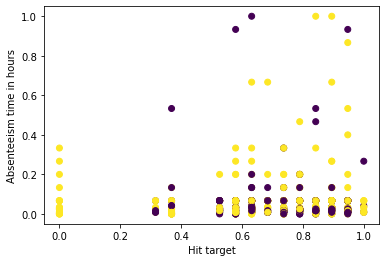

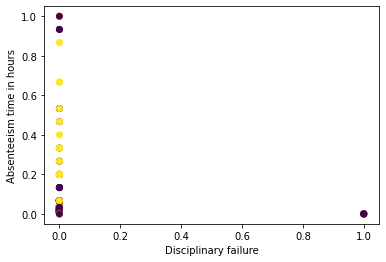

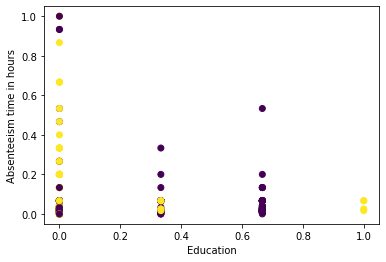

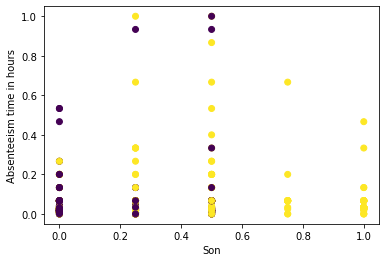

In [42]:
col=[ 'Seasons','Transportation expense', 'Distance from Residence to Work','Service time', 'Age', 'Work load Average/day ', 'Hit target','Disciplinary failure', 'Education', 'Son']
for i in col:
    plt.scatter(x[i], x["Absenteeism time in hours"], c=x['pca_km_labels'])
    plt.xlabel(i)
    plt.ylabel("Absenteeism time in hours")
    plt.show()

# Agglomerative Clustering

In [43]:
agg=AgglomerativeClustering(n_clusters=5)
agg_nor=agg.fit_predict(x)

In [44]:
metrics.silhouette_score(x, agg.labels_)

0.1480859759864209

## With Dimensionality Reduction

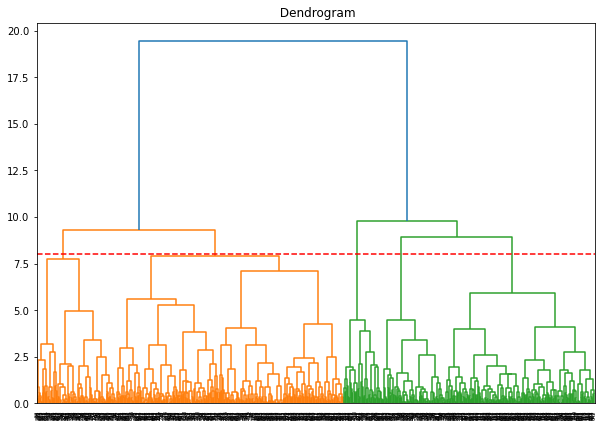

In [45]:
plt.figure(figsize=(10,7))
dendrogrm = sch.dendrogram(sch.linkage(pca_df, method = 'ward'),labels=x.index)
plt.axhline(y=8, color='r', linestyle='--')

plt.title(' Dendrogram')
plt.show()

In [46]:
agg1=AgglomerativeClustering(n_clusters=5)
agg_pca_df=agg1.fit_predict(pca_df)

In [47]:
x['pca_agg_labels']=agg1.labels_

In [48]:
metrics.silhouette_score(x,x['pca_agg_labels'])

0.30119830357382504

In [49]:
metrics.silhouette_score(x, agg1.labels_)

0.30119830357382504

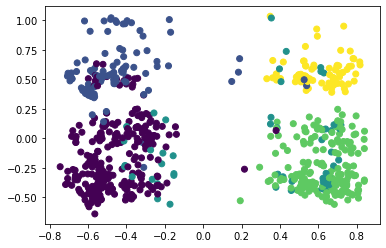

In [50]:
plt.scatter(pca_df[:,0],pca_df[:,1], c=x['pca_agg_labels'])

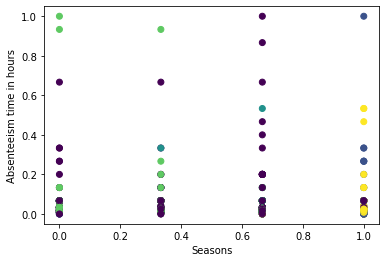

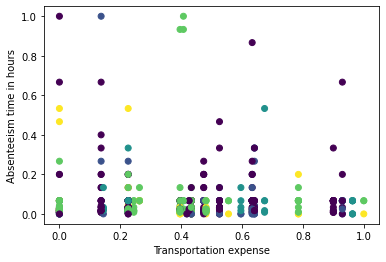

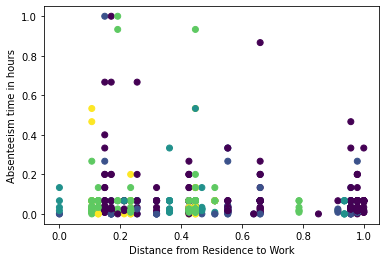

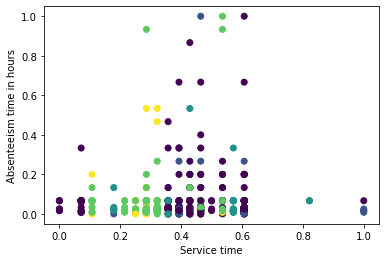

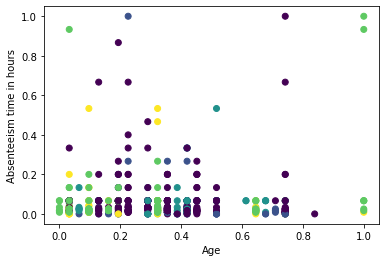

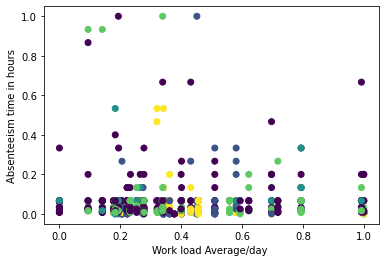

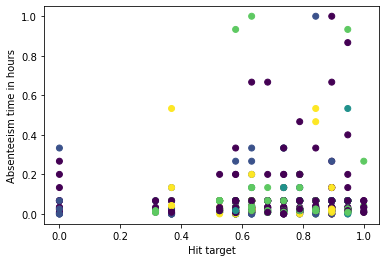

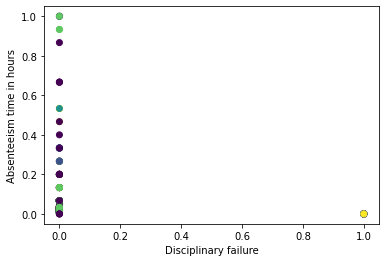

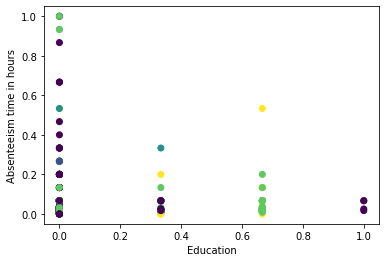

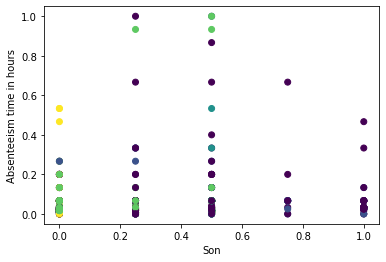

In [51]:
col=[ 'Seasons','Transportation expense', 'Distance from Residence to Work','Service time', 'Age', 'Work load Average/day ', 'Hit target','Disciplinary failure', 'Education', 'Son']
for i in col:
    plt.scatter(x[i], x["Absenteeism time in hours"], c=x['pca_agg_labels'])
    plt.xlabel(i)
    plt.ylabel("Absenteeism time in hours")
    plt.show()

# DBSCAN

## Without Dimensionality Reduction

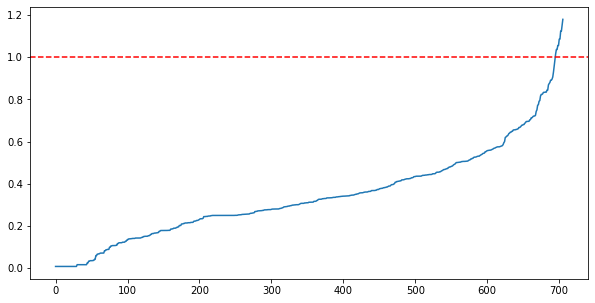

In [52]:
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(x)
distances,indices=nbrs.kneighbors(x)
distances=np.sort(distances, axis=0)
distances=distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [53]:
dbs=DBSCAN(eps=1,min_samples=10)
dbs_nor=dbs.fit_predict(x)


In [54]:
 metrics.silhouette_score(x,dbs.labels_)

0.259990540345546

## With Dimensionality Reduction

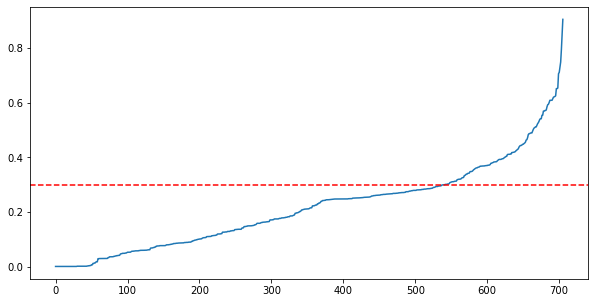

In [55]:
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(pca_df)
distances,indices=nbrs.kneighbors(pca_df)
distances=np.sort(distances, axis=0)
distances=distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

In [56]:
dbs1=DBSCAN(eps=0.3,min_samples=10)
dbs_pca=dbs1.fit_predict(pca_df)


In [57]:
x['pca_dbs_labels']=dbs1.labels_

In [58]:
metrics.silhouette_score(x, agg1.labels_)

0.21359267454385475

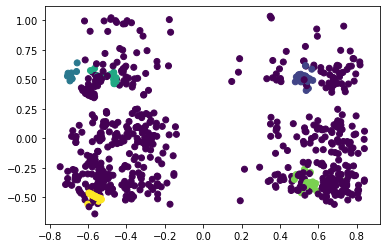

In [59]:
plt.scatter(pca_df[:,0],pca_df[:,1], c=x['pca_dbs_labels'])

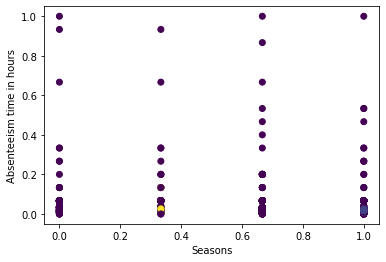

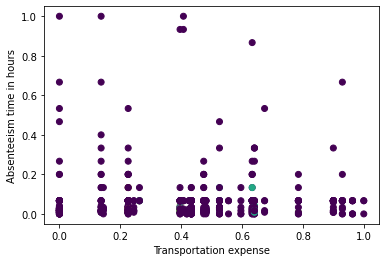

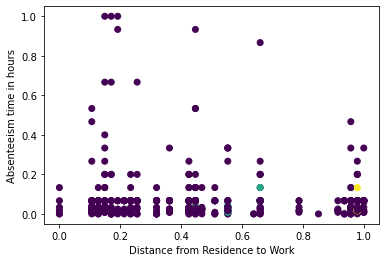

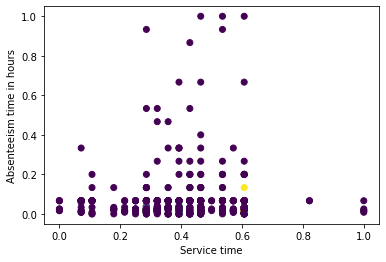

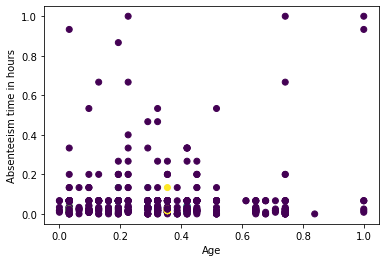

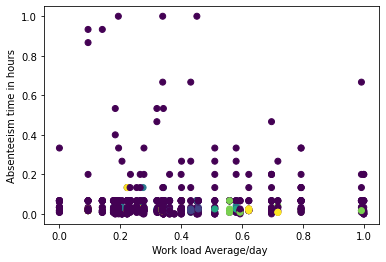

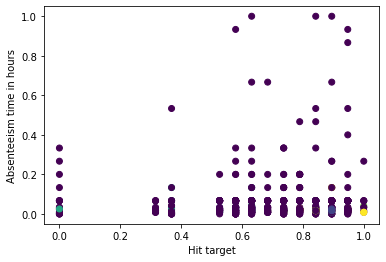

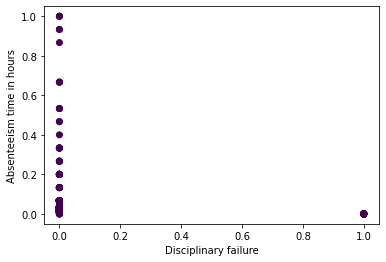

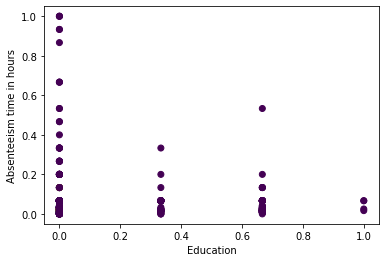

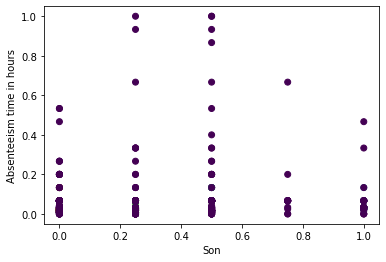

In [60]:
col=[ 'Seasons','Transportation expense', 'Distance from Residence to Work','Service time', 'Age', 'Work load Average/day ', 'Hit target','Disciplinary failure', 'Education', 'Son']
for i in col:
    plt.scatter(x[i], x["Absenteeism time in hours"], c=x['pca_dbs_labels'])
    plt.xlabel(i)
    plt.ylabel("Absenteeism time in hours")
    plt.show()

In [61]:
dic={
    'Clustering':['KMean','Agglomerative','DBSCAN'],
    'Without PCA':[0.21,0.30,0.26],
    'With PCA':[0.44, 0.30,0.21]
}

In [62]:
data=pd.DataFrame(dic)

In [63]:
data

,Clustering,Without PCA,With PCA
0,KMean,0.21,0.44
1,Agglomerative,0.30,0.30
2,DBSCAN,0.26,0.21
